# Spam Project for PEC

Import the Libraries needed

In [389]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

Read Raw Data

In [390]:
df = pd.read_excel('spamdata.xlsx')

In [458]:
df.columns

Index(['ENQUIRY_REQUEST_ID', 'MESSAGE_CENTER_ID', 'MESSAGE_TYPE',
       'ENQUIRY_ITEM_TYPE', 'ENQUIRY_TYPE', 'FAIRSYMBOL', 'FAIRFISCALYEAR',
       'EMS_ORDER_NO', 'COMPANY_ID', 'PRODUCT_ID', 'WTMCID', 'DEVICETYPE',
       'ADSYSID', 'CHANNEL (ER)', 'LAST_CHANNEL (AKAMAI)',
       'LAST_CHANNEL_LABEL (AKAMAI)', 'LAST_PUB_CODE (AKAMAI)',
       'LAST_ISSUE_NUM (AKAMAI)', 'SENDER_EMAIL_ADDR', 'SEND_DATE', 'SPAM_IND',
       'STATUS', 'ENQUIRY_NATURE', 'ENQUIRY_NATURE_DESC', 'MESSAGE', 'SUBJECT',
       'ENQUIRY_COUNT_IN_SAME_REQUEST', 'lan'],
      dtype='object')

In [460]:
df.iloc[1,:]

ENQUIRY_REQUEST_ID               3948790                                                                    
MESSAGE_CENTER_ID                31055318                                                                   
MESSAGE_TYPE                     CEX                                                                        
ENQUIRY_ITEM_TYPE                E                                                                          
ENQUIRY_TYPE                     NaN                                                                        
FAIRSYMBOL                       NaN                                                                        
FAIRFISCALYEAR                   NaN                                                                        
EMS_ORDER_NO                     1.08642e+07                                                                
COMPANY_ID                       437054                                                                     
PRODUCT_ID         

In [391]:
df['MESSAGE'].head()

0    Happy New Year!&nbsp;<br />\r\n新年快樂<br />\r\n<br />\r\nIn this special moment, 36Link present you a special gift! Let&rsquo;s celebrate the New Year with new technologies.<br />\r\n在這值得慶祝的時刻, 36Link為您送上一份特別的禮物。 讓我們用科技及系統慶祝新一年嘅來臨。<br />\r\n&nbsp;<br />\r\n36Link Truck Management System (https://www.36link.net/)&nbsp;is now covered by Technology Voucher Programme! Max fund HKD 200K from HK Gov&rsquo;t.<br />\r\n36Link卡車管理系統現在已經包含在&ldquo;科技券計劃&rdquo;的資助範圍,&nbsp;贵公司可以最多從基金裏拿到20萬港元的創新科技基金。<br />\r\n&nbsp;<br />\r\nIt&rsquo;s the best time to exploit the power of system and unlock the unlimited resources in the network.<br />\r\n就在這最佳的時機利用系統的力量去增加公司的效率及透明度， 從網絡裏找到無限的資源及商機。<br />\r\n&nbsp;<br />\r\nOur 36Link Truck Management System is one of the best in the market. The developed company Acquaintance Enterprises Ltd is the incubated company by Hong Kong Science and Technology Park (HKSTP) and is registered with Hong Kong R&amp;D Centre for logistics and Supply Chain Management enabling T

In [392]:
df['MESSAGE'].iloc[5]

'Please quote me the latest price of the above product.<br><br>Purchase Quantity: 3000 piece(s)<br><br><br />\r\nSir,<br />\r\n<br />\r\n&nbsp;<br />\r\n<br />\r\n<br />\r\n<br />\r\nWe are interested to purchase your supplyment product.<br />\r\n<br />\r\n<br />\r\n<br />\r\nKindly send your quotations and price list to us.<br />\r\n<br />\r\n<br />\r\n<br />\r\nFor more details about this order, please contact:Mr Desmond Attah.<br />\r\n<br />\r\nEmail:rita_izus@lovecat.com<br />\r\nEmail:rita_salicheconsultant@consultant.com<br />\r\n<br />\r\nWaiting to hear from you asap.<br />\r\n<br />\r\n&nbsp;<br />\r\n<br />\r\nThanks<br />\r\n<br />\r\n<br />\r\nMs Rita Izuchukwu.<br />\r\n<br />\r\nManager Lenient Consultant Agency.<br />\r\n<br />\r\n<br />\r\nEmail: rita_izus@lovecat.com<br />\r\nEmail:rita_salicheconsultant@consultant.com<br />\r\n<br />\r\n<br />\r\n'

In [393]:
df[df['SPAM_IND']=='N']['MESSAGE'].iloc[10]

'Dear&nbsp; manager,<br />\r\nHave a good day!<br />\r\nWe are the manufacture of Canned fruit,our main products are:<br />\r\nCanned yellow peach<br />\r\nCanned apple sauce<br />\r\nCanned solid pack sliced apples<br />\r\nIf you have any need,pls contact us,we will offer the best price to you.<br />\r\nBest regards,<br />\r\nMandy'

In [394]:
def lan_detector(s):
        try:
            s.encode(encoding='utf-8').decode('ascii')
            return 'Eng'
        except UnicodeDecodeError:
            return 'Chi'

In [395]:
df['lan']=df['MESSAGE'].apply(lan_detector)

In [396]:
dfc=df[df['lan']=='Chi']
dfe=df[df['lan']=='Eng']

In [397]:
dfe=dfe.reset_index(drop=True)
dfc=dfc.reset_index(drop=True)

In [398]:
dfe.columns

Index(['ENQUIRY_REQUEST_ID', 'MESSAGE_CENTER_ID', 'MESSAGE_TYPE',
       'ENQUIRY_ITEM_TYPE', 'ENQUIRY_TYPE', 'FAIRSYMBOL', 'FAIRFISCALYEAR',
       'EMS_ORDER_NO', 'COMPANY_ID', 'PRODUCT_ID', 'WTMCID', 'DEVICETYPE',
       'ADSYSID', 'CHANNEL (ER)', 'LAST_CHANNEL (AKAMAI)',
       'LAST_CHANNEL_LABEL (AKAMAI)', 'LAST_PUB_CODE (AKAMAI)',
       'LAST_ISSUE_NUM (AKAMAI)', 'SENDER_EMAIL_ADDR', 'SEND_DATE', 'SPAM_IND',
       'STATUS', 'ENQUIRY_NATURE', 'ENQUIRY_NATURE_DESC', 'MESSAGE', 'SUBJECT',
       'ENQUIRY_COUNT_IN_SAME_REQUEST', 'lan'],
      dtype='object')

In [399]:
dfc.groupby('SPAM_IND').count().iloc[:,0]

SPAM_IND
N    35 
Y    235
Name: ENQUIRY_REQUEST_ID, dtype: int64

In [400]:
dfe.groupby('SPAM_IND').count().iloc[:,0]

SPAM_IND
N    29  
Y    1543
Name: ENQUIRY_REQUEST_ID, dtype: int64

In [459]:
dfe.iloc[16,:]

p_message    hi  we are a company based in izmir turkey our main businesses are sea cucumber topshell octopus cuttlefish we produce all the products we sell processing over 200 tons of sea cucumber yearly we have three kinds of sea cucumbers holothuria mammata spiky holothuria mammata nonspiky holothuria polii  our dried products are all shaped well straight with no calcium and no smell of the highest quality  if you have an interest you can also visit our website WEBSITEpany and products please do not hesitate to contact us if you need further assistance
spam         1                                                                                                                                                                                                                                                                                                                                                                                                                                        

Split the Dataset into English and those containing Chinese

In [402]:
eg1=dfc['MESSAGE'].iloc[0]
eg2=dfc['MESSAGE'].iloc[1]

In [403]:
eg1=dfe['MESSAGE'].iloc[0]
eg4=dfe['MESSAGE'].iloc[3]

In [404]:
def parse_eng(text):
    #initial parsed text
    text=text.lower().replace("\n&nbsp"," ").replace("\nbsp"," ").replace("<br />"," ").replace("\n"," ").replace("\r","").replace("<br>"," ")
    #replace email address to EMAIL
    text=re.sub("\S*@\S*\s?", "EMAIL",text)
    #replace website url to WEBSITE
    text=re.sub(r'http://.*.com',"WEBSITE",text)
    text=re.sub(r'https://.*.com',"WEBSITE",text)
    text=re.sub(r'www.*.com',"WEBSITE",text)
    text=re.sub(r'[^\w\s]','',text)
    return text

In [405]:
dfe['p_message']=dfe['MESSAGE'].apply(parse_eng)

In [406]:
dfe['spam']=dfe['SPAM_IND'].apply(lambda x: 1 if x=='N' else 0)

In [407]:
dfe=dfe[['p_message','spam']]
dfe[dfe['spam']==0].head(10)

,p_message,spam
0,please quote me the latest price of the above product purchase quantity 10 pieces hello i need 10 pieces of this item can you ship it to israel and do you accept visaor payapl please contact me with EMAIL here you can see stores that i working with in israel WEBSITE,0
1,a buyer with the below contact info has just registered for our upcoming hktdc hong kong international lighting fair spring edition and is interested in your product as shown you may want to contact himher and prepare in advance for more detailed discussion during the fair period best regards hong kong trade development council,0
2,please quote me the latest price of the above product purchase quantity 10000 pieces hello we are interested in your products and we are taking this opportunity to request your firm to submit the quotation best price for the supply of your product reply us back to email EMAIL quick response will be appreciated regards gwendolyn cortez,0
3,please quote me the latest price of the above product purchase quantity 3000 pieces sir we are interested to purchase your supplyment product kindly send your quotations and price list to us for more details about this order please contactmr desmond attah EMAIL EMAIL waiting to hear from you asap thanks ms rita izuchukwu manager lenient consultant agency email EMAIL EMAIL,0
4,please quote me the latest price of the above product purchase quantity 7000 pieces hello i am interested in your product kindly send me the following bellownbsp 1 quote your prices 2 payment termnbsp 3 shipment term reply via my emailnbsp,0
5,would like to know moq,0
6,good day my name is john paul from russia i will like to make an inquiry on your product please inform me on minimum and maximum order quantity and latest product catalog send it asap so that we can place a trial order contact email EMAIL regards john paul ericsson russia inc locality mississauga ontario street address2002425 matheson blvd e country russia postal code l4w 5k4 phone 7 905 2682005 fax 7 905 2682010 reply reply to all,0
7,good day my name is rita mackenzie from canada i will like to make an inquiry on your product please inform me on minimum and maximum order quantity and latest product catalog send it asap so that we can place a trial order contact email EMAILregards rita mackenzie ericsson canada inc locality mississauga ontario street address2002425 matheson blvd e country canada postal code l4w 5k4 phone1 905 2682005 fax1 905 2682010,0
8,please quote me the latest price of the above product purchase quantity inquiry pieces dear sirmadam we are interested in purchasing your products and we sincerely hope to establish a longterm business relation with your esteemed company please kindly send me your latest catalog also inform me about the minimum order quantity delivery time or fob and payment terms warrantyplease contact us via EMAIL your early reply is highly appreciated thank you best regards ____________________ mr amresh lan companynbsp namenbsp apexnbsp global ltd 14 jlnkesidang 3680 jalan raja chulan 50200 kuala lumpur kuala lumpur malaysia tel60102149435,0
9,hi can you please make me your kind quotation for products send me cataloguenbspnbsp kind price time of delivery and packing,0


In [408]:
dfe[dfe['spam']==1].head(10)

,p_message,spam
16,hi we are a company based in izmir turkey our main businesses are sea cucumber topshell octopus cuttlefish we produce all the products we sell processing over 200 tons of sea cucumber yearly we have three kinds of sea cucumbers holothuria mammata spiky holothuria mammata nonspiky holothuria polii our dried products are all shaped well straight with no calcium and no smell of the highest quality if you have an interest you can also visit our website WEBSITEpany and products please do not hesitate to contact us if you need further assistance,1
31,how are you professional custommade silicone products of high quality and low price fast delivery welcome a trial order can be customized according to your logo at WEBSITE the contact miss chen qq 18022738145 2911356103 sky loxiangju,1
32,dear sirmadam i am eve export manager from jsc eksportus lithuania our company mainly exports honey breakfast cereals porridge and other healthy snacks our all products are high quality with more than 9 month shelf life all products are made in europe please sent me email if you are interested to see our commercial offers best regards evejsc eksportus EMAIL skype id ieva eksportus,1
47,dearnbsp manager have a good day we are the manufacture of canned fruitour main products are canned yellow peach canned apple sauce canned solid pack sliced apples if you have any needpls contact uswe will offer the best price to you best regards mandy,1
75,we are pampn group 2013 co ltd located in bangkok thailand we are manufacturer to produce the extra virgin coconut oil we are kindly to negotiate with all the customers requestednbspour extra virgin coconut oil is a premium grade and 100 natural we just launched our new brand named quotsukniyomquot and we are seeking the partners all over the world we also do oem for the customers as well,1
76,dear sirmadam i am eve export manager from jsc eksportus lithuania our company mainly exports honey breakfast cereals porridge and other healthy snacks our all products are high quality with more than 9 month shelf life all products are made in europe please sent me email if you are interested to see our commercial offers best regards evejsc eksportus EMAIL skype id ieva eksportus,1
88,hi supplier wish you happy new year irsquom suraj planning manager base on sri lanka nbspand working in idealpack limited in china below i mentioned our office address in dongguan and we are located in hong kong china germany turkey sri lanka dubai many large and world renowned brands marking their presence mainly in europe the customer base continues to grow with the expansion of the textile industry and the market growth our brand portfolio extends to more than 20 customers around europe we are doing many paper products and we need to find new packing partner in china so we would like to meet you and arrange meeting within 09th jan and 20th jan so please get back to us with your details email address ndash EMAIL contact number 94 710 679 400 our china office address room 211 2 floor no 1 building techology industrial park hua kebo creative garden shida road da lingshan town dongguan city guanggong province china please see below contact details in our china office county manager EMAIL contact number 861 364 282 8527,1
122,please quote me the latest price of the above product purchase quantity gold pieces hi we are royal family from ghana here we have gold for sale or exchange with equipment if the buyer cannbsp also sign agreement so that we can give you for credit after you sell you give us our money we have 300 gold bar now23caratnbsp 97to99 we are selling it whole sale price get back to me for more details we can also give you commission if you give us buyer and you be our front person get back to me if we can do business or not write to my private email EMAIL,1
124,dear jinhua ivy home textile co ltdbrhappy new yearbrbrthis is dongming shi from ningbo mingyi toysltd i am hereby sincerely to invite you to visit our booth on

In [409]:
dfe['spam'].unique()

array([0, 1], dtype=int64)

Split Dataset in Train:Test at a 80:20 ratio

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
X_train,X_test,y_train,y_test = train_test_split(dfe["p_message"],dfe["spam"], test_size = 0.2, random_state = 10)

In [412]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257,)
(315,)
(1257,)
(315,)


In [413]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [414]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '0002nbsp', '004', '0091', '00974', '01', '011', '01156', '01412521017', '01978', '027', '030', '039', '0456', '04674', '0495', '05719', '0681', '07031', '07039']
['yourfaithfull', 'yournbsp', 'yournbspexpression', 'yournbspproducts', 'yours', 'yourwireless', 'youtom', 'youtube', 'youwattford', 'zahra', 'zahrastrong', 'zemin', 'zheng', 'zhengcheng', 'zhongshan', 'zhongwang', 'zhou', 'zip', 'zip17350', 'zone']


In [415]:
X_train_df = vect.transform(X_train)

In [416]:
X_test_df = vect.transform(X_test)

In [417]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [418]:
norm_words = ''
spam_words = ''
spam = dfe[dfe.spam == 1]
norm = dfe[dfe.spam == 0]

In [419]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sholng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [420]:
for val in spam.p_message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in norm.p_message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        norm_words = norm_words + words + ' '

Display some of the highest occurance spam words

In [421]:
from wordcloud import WordCloud

In [422]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
norm_wordcloud = WordCloud(width=600, height=400).generate(norm_words)

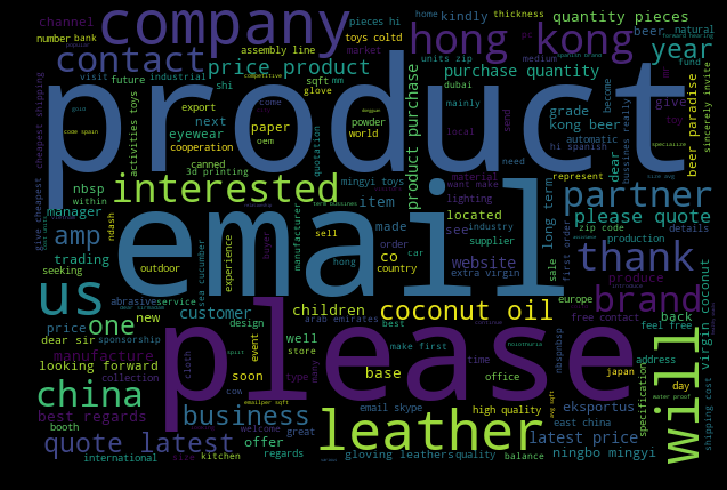

In [423]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Use Naive Bayes Classifer
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [424]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [425]:
prediction["Multinomial"] = model.predict(X_test_df)

In [426]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [427]:
accuracy_score(y_test,prediction["Multinomial"])

0.9746031746031746

Use Logistic Regression

In [428]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [429]:
prediction["Logistic"] = model.predict(X_test_df)

In [430]:
accuracy_score(y_test,prediction["Logistic"])

0.9904761904761905

Use KNN

In [431]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [432]:
prediction["knn"] = model.predict(X_test_df)

In [433]:
accuracy_score(y_test,prediction["knn"])

0.9841269841269841

Using Ensemble

In [434]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [435]:
prediction["random_forest"] = model.predict(X_test_df)

In [436]:
accuracy_score(y_test,prediction["random_forest"])

0.9873015873015873

Using Adaptive Boost Classifer

In [437]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [438]:
prediction["adaboost"] = model.predict(X_test_df)

In [439]:
accuracy_score(y_test,prediction["adaboost"])

0.9936507936507937

Tuning k-NN using GridSearchCV


to find number of group has the best result

In [440]:
from sklearn.model_selection import GridSearchCV

In [441]:
k_range = np.arange(1,30)

In [442]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [443]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [444]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [445]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [446]:
grid.best_params_

{'n_neighbors': 2}

In [447]:
grid.best_score_

0.9832935560859188

In [448]:
grid.grid_scores_

C:\Users\sholng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.98091, std: 0.00390, params: {'n_neighbors': 1},
 mean: 0.98329, std: 0.00000, params: {'n_neighbors': 2},
 mean: 0.98329, std: 0.00000, params: {'n_neighbors': 3},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 4},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 5},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 6},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 7},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 8},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 9},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 10},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 11},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 12},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 13},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 14},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 15},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 16},
 mean: 0.98091, std: 0.00000, params: {'n_neighbors': 17},
 mean:

In [449]:
for test in ['Logistic','knn','Multinomial','random_forest','adaboost']:
    print("Classification Report for {}".format(test))
    print(classification_report(y_test, prediction[test], target_names = ["Norm", "Spam"]))
    print("--- "*15)

Classification Report for Logistic
             precision    recall  f1-score   support

       Norm       0.99      1.00      1.00       310
       Spam       0.75      0.60      0.67         5

avg / total       0.99      0.99      0.99       315

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
Classification Report for knn
             precision    recall  f1-score   support

       Norm       0.98      1.00      0.99       310
       Spam       0.00      0.00      0.00         5

avg / total       0.97      0.98      0.98       315

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
Classification Report for Multinomial
             precision    recall  f1-score   support

       Norm       0.99      0.98      0.99       310
       Spam       0.33      0.60      0.43         5

avg / total       0.98      0.97      0.98       315

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
Classification Report for random_forest
             precision    rec

C:\Users\sholng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [450]:
print(classification_report(y_test, prediction['Logistic'], target_names = ["Norm", "Spam"]))

             precision    recall  f1-score   support

       Norm       0.99      1.00      1.00       310
       Spam       0.75      0.60      0.67         5

avg / total       0.99      0.99      0.99       315



In [451]:
conf_mat = confusion_matrix(y_test, prediction['Logistic'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

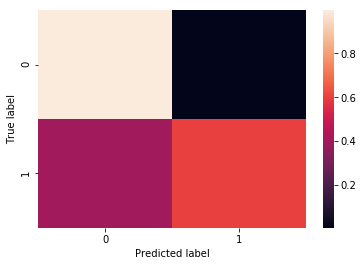

In [452]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [453]:
print(conf_mat)

[[309   1]
 [  2   3]]


In [454]:
pd.set_option('display.max_colwidth', -1)

### Misclassified as Spam

In [455]:
#X_test[y_test < prediction["Logistic"] ]

### Misclassified as Not-spam

In [456]:
X_test[y_test > prediction["Logistic"] ]

31      how are you  professional custommade silicone products of high quality and low price fast delivery welcome a trial order can be customized according to your logo at WEBSITE  the contact miss chen qq 18022738145 2911356103 sky loxiangju                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     